In [1]:
#https://medium.com/towards-formula-1-analysis/analyzing-formula-1-data-using-python-2021-abu-dhabi-gp-minisector-comparison-3d72aa39e5e8

In [1]:
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm
import matplotlib.cbook as cbook
import matplotlib.image as image
from skimage.transform import resize
import numpy as np
import pandas as pd

In [2]:
# Enable the cache
ff1.Cache.enable_cache('cache') 

# Setup plotting
#plotting.setup_mpl()
ff1.plotting.setup_mpl(mpl_timedelta_support=True, color_scheme=None, misc_mpl_mods=False)

In [3]:
# Solicitar variables
year = int(input('Año: '))
wknd = int(input('Round: '))
print('------ Session Type ------')
print('R - Race')
print('Q - Qualifying')
print('SQ - Sprint Qualifying')
print('FP1 - Practice 1')
print('FP2 - Practice 2')
print('FP3 - Practice 3')
print('--------------------------')
ses = input('Session :')
driver1 = input('Piloto 1: ')
driver2 = input('Piloto 2: ')

Año: 2022
Round: 21
------ Session Type ------
R - Race
Q - Qualifying
SQ - Sprint Qualifying
FP1 - Practice 1
FP2 - Practice 2
FP3 - Practice 3
--------------------------
Session :R
Piloto 1: PER
Piloto 2: RUS


In [4]:
# Load the session data
session = ff1.get_session(year, wknd, ses)

# Get the laps
laps_r = session.load(telemetry=True)

core           INFO 	Loading data for São Paulo Grand Prix - Race [v2.2.8]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['63', '44', '55', '16', '14', '1', '11', '31', '77', '18', '5', '24', '47', '10', '23', '6', '22', '4', '20', '3']


In [5]:
laps_driver1 = session.laps.pick_driver(driver1)
laps_driver2 = session.laps.pick_driver(driver2)

fastest_driver1 = laps_driver1.pick_fastest().get_telemetry().add_distance()
fastest_driver2 = laps_driver2.pick_fastest().get_telemetry().add_distance()

fastest_driver1['Driver'] = driver1
fastest_driver2['Driver'] = driver2

telemetry = pd.concat([fastest_driver1, fastest_driver2])
telemetry

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,RelativeDistance,Status,X,Y,Z,Distance,Driver
2,2022-11-13 19:29:02.427,0 days 02:28:01.401000,,180.433889,0 days 00:00:00,11006,309,8,100,False,1,interpolation,0.000007,OnTrack,-4177,-2152,7766,0.000000,PER
3,2022-11-13 19:29:02.505,0 days 02:28:01.479000,,180.433889,0 days 00:00:00.078000,11011,309,8,100,False,1,pos,0.001586,OnTrack,-4162,-2217,7769,6.695000,PER
4,2022-11-13 19:29:02.650,0 days 02:28:01.624000,,180.433889,0 days 00:00:00.223000,11021,310,8,100,False,1,car,0.004522,OnTrack,-4132,-2337,7772,19.181111,PER
5,2022-11-13 19:29:02.665,0 days 02:28:01.639000,,180.433889,0 days 00:00:00.238000,11032,310,8,100,False,1,pos,0.004826,OnTrack,-4129,-2350,7773,20.472778,PER
6,2022-11-13 19:29:02.865,0 days 02:28:01.839000,,180.433889,0 days 00:00:00.438000,11043,310,8,100,False,1,pos,0.008874,OnTrack,-4086,-2517,7777,37.695000,PER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,2022-11-13 19:28:58.811,0 days 02:27:57.785000,,NaN,0 days 00:01:13.381000,10933,297,8,100,False,1,car,0.987601,OnTrack,-4285,-1730,7754,4203.248889,RUS
554,2022-11-13 19:28:58.884,0 days 02:27:57.858000,,NaN,0 days 00:01:13.454000,10965,297,8,100,False,1,pos,0.989014,OnTrack,-4272,-1783,7756,4209.271389,RUS
555,2022-11-13 19:28:59.010,0 days 02:27:57.984000,,NaN,0 days 00:01:13.580000,10998,297,8,100,False,1,car,0.991454,OnTrack,-4241,-1904,7759,4219.666389,RUS
556,2022-11-13 19:28:59.144,0 days 02:27:58.118000,,NaN,0 days 00:01:13.714000,10985,297,8,100,False,1,pos,0.994052,OnTrack,-4205,-2050,7765,4230.721389,RUS


In [6]:
# We want 25 mini-sectors (this can be adjusted up and down)
#num_minisectors = 25
num_minisectors = 25

# Grab the maximum value of distance that is known in the telemetry
total_distance = total_distance = max(telemetry['Distance'])

# Generate equally sized mini-sectors 
minisector_length = total_distance / num_minisectors

In [7]:
# Initiate minisector variable, with 0 (meters) as a starting point.
minisectors = [0]

# Add multiples of minisector_length to the minisectors
for i in range(0, (num_minisectors - 1)):
    minisectors.append(minisector_length * (i + 1))

In [8]:
telemetry['Minisector'] = telemetry['Distance'].apply(
    lambda dist: (
        int((dist // minisector_length) + 1)
    )
)

In [9]:
# Calculate avg. speed per driver per mini sector
average_speed = telemetry.groupby(['Minisector', 'Driver'])['Speed'].mean().reset_index()


In [10]:
# Select the driver with the highest average speed
fastest_driver = average_speed.loc[average_speed.groupby(['Minisector'])['Speed'].idxmax()]

# Get rid of the speed column and rename the driver column
fastest_driver = fastest_driver[['Minisector', 'Driver']].rename(columns={'Driver': 'Fastest_driver'})


In [11]:
# Join the fastest driver per minisector with the full telemetry
telemetry = telemetry.merge(fastest_driver, on=['Minisector'])

# Order the data by distance to make matploblib does not get confused
telemetry = telemetry.sort_values(by=['Distance'])

# Convert driver name to integer
telemetry.loc[telemetry['Fastest_driver'] == driver1, 'Fastest_driver_int'] = 1
telemetry.loc[telemetry['Fastest_driver'] == driver2, 'Fastest_driver_int'] = 2


In [12]:
tm1 = session.get_driver(driver1).TeamName
tm1 = tm1.lower().replace(" ", "")
print(tm1)
tm2 = session.get_driver(driver2).TeamName
tm2 = tm2.lower().replace(" ", "")
print(tm2)

redbullracing
mercedes


In [13]:
if ses == 'R': 
    letrero = 'Race'
elif ses == 'Q':
    letrero = 'Qualy'
elif ses == 'SQ':
    letrero = 'Sprint'
else:
    letrero = 'Practice'

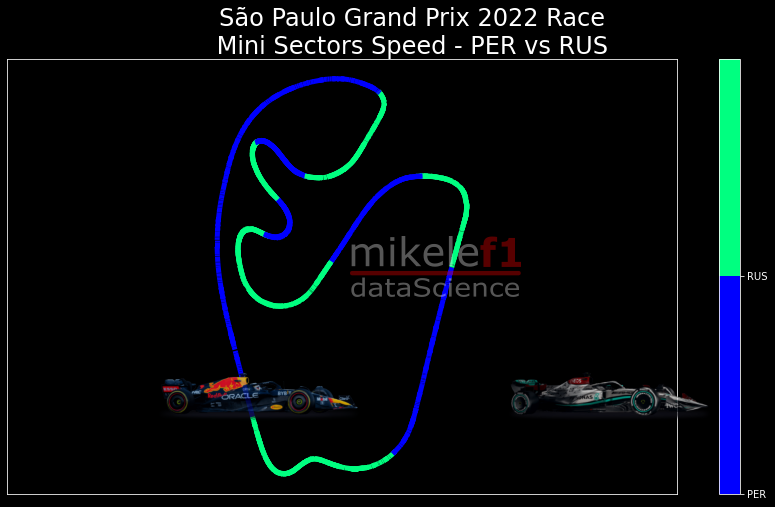

In [14]:
with cbook.get_sample_data('/Users/rubenrodriguez/Documents/anaconda/fastf1/images/logog.png') as file:
    im = image.imread(file)
    
car1 = image.imread('./images/'+tm1+'.png')
res1 = resize(car1, (97/1.5, 329/1.5))

car2 = image.imread('./images/'+tm2+'.png')
res2 = resize(car2, (97/1.5, 329/1.5))

#Modo oscuro
plt.style.use('dark_background')

fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(15, 8))


plt.rcParams['figure.figsize'] = [15, 8]

plt.suptitle(f"{session.event['EventName']} {session.event.year} {letrero}\n Mini Sectors Speed - {driver1} vs {driver2} \n"
             , size=24, y=0.97)


x = np.array(telemetry['X'].values)
y = np.array(telemetry['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fastest_driver_array = telemetry['Fastest_driver_int'].to_numpy().astype(float)
#'RdBu' ferrari - redbull
#'winter' redbull - mercedes , set 1 ferrari alfa romeo
#'bwr' redbull vs ferrari
cmap = cm.get_cmap('winter', 2)

color1 = ff1.plotting.driver_color(driver1)
color2 = ff1.plotting.driver_color(driver2)
colors=[color1,color2]


lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
#lc_comp = LineCollection(segments,colors = colors)
lc_comp.set_array(fastest_driver_array)
lc_comp.set_linewidth(5)

plt.rcParams['figure.figsize'] = [18, 10]

plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

cbar = plt.colorbar(lc_comp, ticks=np.linspace(0, 2, cmap.N+1)) 
cbar.ax.set_yticklabels(('',driver1,driver2)) # add the labels




fig.figimage(im, xo=350, yo=210, zorder=13, alpha=.35)
fig.figimage(res1, xo=150, yo=80, origin='upper', alpha=.80)
fig.figimage(res2, xo=500, yo=80, origin='upper', alpha=.80)

nombrearchivo = str(year)+'-'+str(wknd)+'-MSS-'+ses+'-'+driver1+'-'+driver2+'.png'
#plt.savefig(nombrearchivo, dpi=300)
plt.savefig(nombrearchivo)

plt.show()